# 📊 Fase 2 - Vizualization

This script performs a full first-pass analysis of a dataset using `pandas` and `numpy`. 

### 1. **Library imports**  

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr



### 2. **Dataset loading and configuration**  

In [113]:
df = pd.read_csv("Customer Loyalty Program & Flight Data – Canada.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### 3. **Resumen de los Gráficos más Utilizados**

| **Gráfico**          | **Tipo de variable**    | **Nº de variables** | **Uso típico**                                               | **Función Seaborn / Matplotlib**         |
| -------------------- | ----------------------- | ------------------- | ------------------------------------------------------------ | ---------------------------------------- |
| **Histograma**       | Numérica (cuantitativa) | Univariada          | Distribución de frecuencias de una variable numérica         | `sns.histplot(data=df, x='variable')`    |
| **Countplot**        | Categórica              | Univariada          | Conteo de ocurrencias por categoría                          | `sns.countplot(data=df, x='variable')`   |
| **Barplot**          | Categórica + Numérica   | Bivariada           | Comparar medias (o sumas) de una variable numérica por grupo | `sns.barplot(data=df, x='cat', y='num')` |
| **Boxplot**          | Numérica + Categórica   | Bivariada           | Distribución, mediana y valores atípicos por categoría       | `sns.boxplot(data=df, x='cat', y='num')` |
| **Scatterplot**      | Numérica + Numérica     | Bivariada           | Relación entre dos variables numéricas (correlación)         | `sns.scatterplot(data=df, x='x', y='y')` |
| **Gráfico de Tarta** | Categórica              | Univariada          | Proporción relativa entre categorías                         | `plt.pie(valores, labels=etiquetas)`     |


In [114]:
df.head(1)

,Loyalty Number,Year,Month,Flights Booked,Flights With Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,Clv,Enrollment Type,Enrollment Year,Enrollment Month,Cancelled
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,False


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?


**Justificación técnica del gráfico**
  
Número de variables = 3 

Tipos de variables: 
- Flights Booked (Numérica)  
- Month (Categórica - Numérica falsa ya que los numeros representan cada mes del año)  
- Year (en este ejemplo, categórica, ya que estamos comparando dos años específicos (2017 y 2018) y no analizando una tendencia a lo largo de varios años)  

Gráfico: Barplot  
Explicación de la elección: Barplot se utiliza para visualizar la distribución de una variable numérica en relación con una variable categórica. Como queremos saber cómo se distribuye la cantidad de vuelos reservados a lo largo de los meses y tenemos dos años distintos, usamos el parámetro hue para diferenciar los valores correspondientes a cada año.


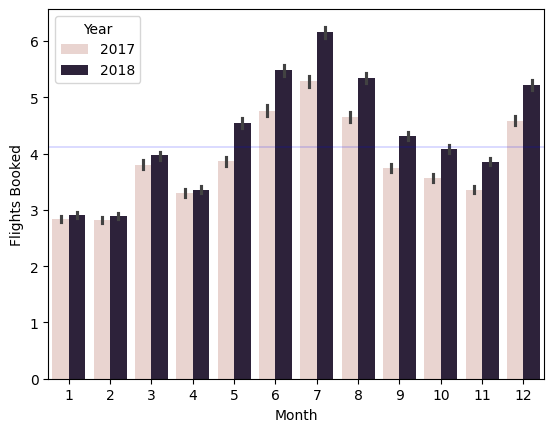

In [115]:
media_voos = df['Flights Booked'].mean()
sns.barplot(data=df, y='Flights Booked', x='Month', hue='Year')
plt.axhline(y=media_voos, color='blue',linewidth=0.2);


Los meses 6 (junio), 7 (julio), 8 (agosto) y 12 (diciembre) presentan los niveles más altos de vuelos reservados en el año. Esto puede justificarse por ser meses asociados a vacaciones de verano y festividades de fin de año, lo cual impulsa el aumento de la demanda de viajes en Canadá.

Por otro lado, los meses 1 (enero) y 2 (febrero) muestran la menor cantidad de reservas, lo cual puede explicarse por las condiciones climáticas del invierno canadiense, que generalmente reducen la frecuencia de viajes.

Finalmente, se observa que el año 2018 tuvo un número mayor de reservas en comparación con 2017, lo que indica un desempeño positivo y un posible crecimiento en las operaciones de la empresa de viajes.

In [116]:
df.head(1)

,Loyalty Number,Year,Month,Flights Booked,Flights With Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,Clv,Enrollment Type,Enrollment Year,Enrollment Month,Cancelled
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,False


2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

**Justificación técnica del gráfico**  

Número de variables = 3 (Distance, Points Accumulated, Year)  
Tipo de variable:  
- Distance (Numérica)  
- Points Accumulated (Numérica)  
- Year (en este ejemplo, categórica, ya que estamos comparando dos años específicos — 2017 y 2018 — y no analizando una tendencia a lo largo de varios años)  

Gráfico = Scatterplot  
Explicación de la elección: El scatterplot se utiliza para visualizar la correlación entre dos variables numéricas. En este caso, queremos analizar la relación entre la distancia de los vuelos (Distance) y los puntos acumulados (Points Accumulated). Utilizaremos el parámetro hue para diferenciar los valores correspondientes a cada año.


In [117]:
round(df.groupby('Year')[['Distance', 'Points Accumulated']].corr(), 2)


Distance  Points Accumulated
Year                                                 
2017 Distance                1.00                1.00
     Points Accumulated      1.00                1.00
2018 Distance                1.00                0.99
     Points Accumulated      0.99                1.00

| Valor de correlación | Interpretación                |
| -------------------- | ----------------------------- |
| **+1.00**            | **Correlación positiva perfecta** |
| **0.70 a +0.99**     | **Correlación positiva fuerte**   |
|  +0.40 a +0.69       | Correlación positiva moderada |
|  +0.10 a +0.39       | Correlación positiva débil    |
|  0                   | Sin correlación lineal        |
|  -0.10 a -0.39       | Correlación negativa débil    |
|  -0.40 a -0.69       | Correlación negativa moderada |
|  -0.70 a -0.99       | Correlación negativa fuerte   |
|  -1.00               | Correlación negativa perfecta |


La correlación es una forma de saber si dos cosas están relacionadas — es decir, si cuando una cambia, la otra también cambia.

- Distance = distancia volada por el cliente  
- Points Accumulated = puntos que el cliente ganó  

Si la correlación entre estas dos variables es alta, eso significa que:  
- Cuando la distancia aumenta, los puntos también aumentan.  
- Cuando la distancia disminuye, los puntos también disminuyen.

🎯 ¿Qué significan los valores?

- Cerca de **+1** → relación muy fuerte y positiva  
  (cuando una sube, la otra también sube)

- Cerca de **-1** → relación muy fuerte pero negativa  
  (cuando una sube, la otra baja)

- Cerca de **0** → no hay una relación clara entre las dos

En este caso, la correlación fue **0.99** y **1.00** →  
Eso significa que **cuanto mayor es la distancia volada, más puntos acumula el cliente**.


**Otros Ejemplos de Correlación**

| Tipo                     | Exemplo                                                              |
| ------------------------ | --------------------------------------------------------------------------------------------------------------------------------------------- |
| **Correlación positiva** | Cuanto mayor es el nivel educativo de una persona, mayor suele ser su ingreso promedio.*                                                   |
| **Correlación negativa** | Cuanto mayor es la tasa de vacunación en una comunidad, menor es la incidencia de enfermedades prevenibles.                               |
| **Correlación nula**     | No se encuentra una correlación significativa entre el número de reuniones internas y el rendimiento financiero trimestral de la empresa. |


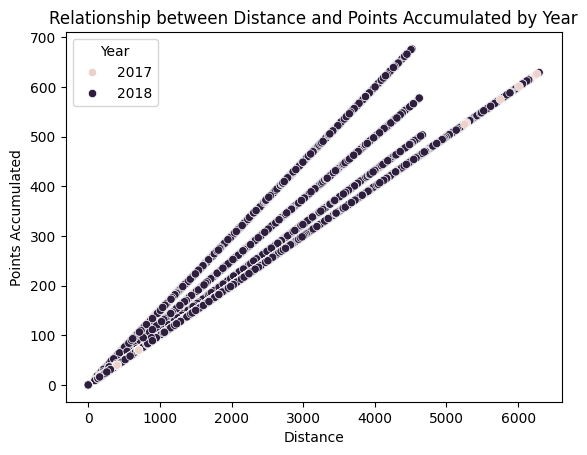

In [118]:
sns.scatterplot(data=df, x='Distance', y='Points Accumulated', hue='Year')
plt.title('Relationship between Distance and Points Accumulated by Year');

A pesar de que visualmente ya era bastante evidente esta variación lineal, y también por el resultado de 0,99 y 1.00, he ejecutado el gráfico de Pearson, ya que el gráfico de Pearson es más adecuado para relaciones lineales y distribuciones normales, mientras que el coeficiente de Spearman es más apropiado para situaciones en las que los datos no siguen una distribución normal o no tienen una relación lineal clara.

In [119]:
# Calcular o coeficiente de Pearson
correlation, valor_p = pearsonr(df['Distance'], df['Points Accumulated'])
# The first result (the correlation) is stored in the variable 'correlation', 
# and the second result (the p-value) is ignored using the underscore '_'.

print(f'O coeficiente de correlação de Pearson é: {round(correlation, 2)}')
print(f'O valor-p é: {valor_p}')

# If the p-value is small (typically less than 0.05), it means the correlation is statistically significant, and we can trust that the relationship is real.
# If the p-value is large (greater than 0.05), it means the correlation might have happened by chance, so we should be cautious when interpreting it.

# The correlation value tells us how strongly two variables are related.
# The p-value tells us whether we can trust that relationship or if it might just be due to chance.

O coeficiente de correlação de Pearson é: 0.99
O valor-p é: 0.0


| **Característica**             | **Pearson**                                                                                        | **Spearman**                                                                                    |
| ------------------------------ | -------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------- |
| **Tipo de relación detectada** | Relación **lineal** – los cambios en una variable se reflejan en cambios proporcionales en la otra | Relación **monótona** – una variable siempre sube o siempre baja, sin requerir proporcionalidad |
| **Variables permitidas**       | Variables numéricas continuas con distribución normal                                              | Variables numéricas u ordinales, no requiere distribución normal                                |
| **Uso ideal**                  | Datos con relación proporcional o lineal                                                           | Datos con relaciones crecientes/decrecientes no lineales o de tipo ordinal                      |
| **Gráfico ideal (Seaborn)**    | `sns.regplot()`                                                                                    | `sns.scatterplot()`, `sns.lineplot()`                                                           |
| **Python (pandas)**            | `df.corr(method='pearson')`                                                                        | `df.corr(method='spearman')`                                                                    |
| **Python (scipy)**             | `pearsonr(x, y)`                                                                                   | `spearmanr(x, y)`                                                                               |


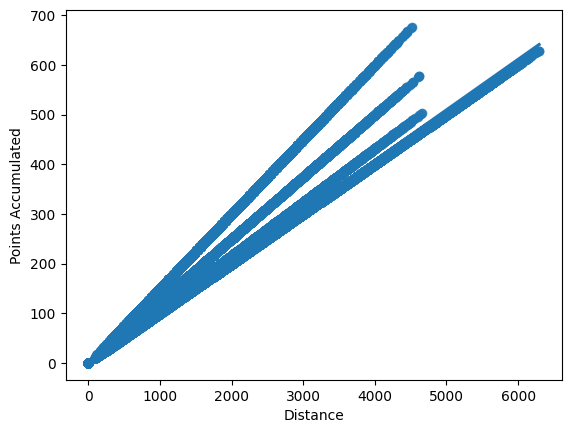

In [120]:
sns.regplot(data=df, x='Distance', y='Points Accumulated');

3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [121]:
df.head(1)

,Loyalty Number,Year,Month,Flights Booked,Flights With Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,Clv,Enrollment Type,Enrollment Year,Enrollment Month,Cancelled
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,False


**Justificación técnica del gráfico**  

Número de variables = 2 (Loyalt Number, Province)  
Tipo de variable:  
- Loyalt Number (Categorica) -> Despues del group by -> numerica ya que sera la suma de los Loyalt Numbers
- Province (Categorica)
 

Gráfico = Barplot
Explicación de la elección: El gráfico fue elegido porque puede utilizar una variable numérica junto con una variable categórica. A pesar de que el "Loyalty Number" está escrito en forma numérica, en realidad tiene un valor categórico, ya que representa la identificación de un cliente, es un “falso numérico”. Sin embargo, para saber la cantidad de clientes por provincia, tendremos que hacer un “group by” y sumar. De esta manera, obtendremos una suma del "Loyalty Number" y esta variable se convertirá en completamente numérica.


In [122]:
loyalt_number_by_province = df.groupby('Province')['Loyalty Number'].nunique().reset_index()
loyalt_number_by_province.columns = ['Province', 'Customers by Province']
loyalt_number_by_province = loyalt_number_by_province.sort_values('Customers by Province', ascending=False)
loyalt_number_by_province



,Province,Customers by Province
6,Ontario,5404
1,British Columbia,4409
8,Quebec,3300
0,Alberta,969
2,Manitoba,658
3,New Brunswick,636
5,Nova Scotia,518
9,Saskatchewan,409
4,Newfoundland,258
10,Yukon,110


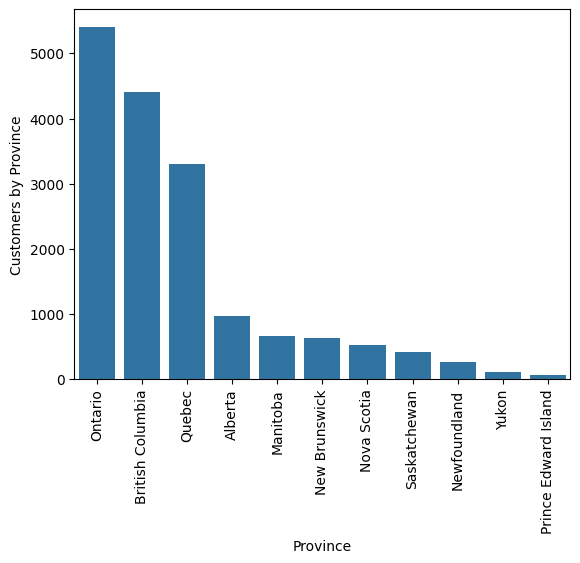

In [123]:
sns.barplot(data=loyalt_number_by_province , x='Province', y='Customers by Province')
plt.xticks(rotation=90);

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [124]:
df.head(1)

,Loyalty Number,Year,Month,Flights Booked,Flights With Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,Clv,Enrollment Type,Enrollment Year,Enrollment Month,Cancelled
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,False


**Justificación técnica del gráfico**  

Número de variables: 2 (Education, Salary)  
Tipos de variables: 
  - Education (Categórica)  
  - Salary (Numérica)  

Gráfico = Boxplot  

Explicación de la elección: El boxplot se utiliza para verificar la distribución, la mediana y los valores atípicos por categoría. En este caso, queremos observar la distribución del salario (variable numérica) según las categorías de educación (variable categórica).


<Axes: xlabel='Salary', ylabel='Education'>

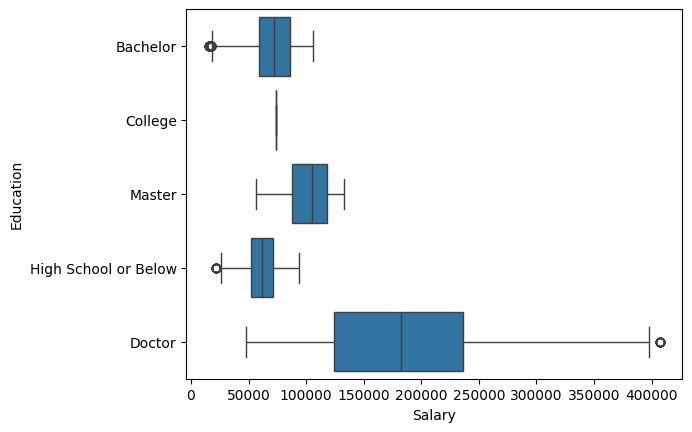

In [125]:
sns.boxplot(data=df, y='Education', x='Salary')
# plt.xlim(0, 350000) to zoom in 



5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?


In [126]:
df.head(1)

,Loyalty Number,Year,Month,Flights Booked,Flights With Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,Clv,Enrollment Type,Enrollment Year,Enrollment Month,Cancelled
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,False


In [127]:
# For this analysis, the dataframe was filtered by Cancelled == False to analyze only the customers who are still active in the loyalty program.
df_activos = df[df['Cancelled'] == False] 

# To discover de proportion of customers by category
cards = df_activos.value_counts('Loyalty Card') 
df_activos_cards = round((cards / cards.sum()) * 100, 2).reset_index()
df_activos_cards.columns = ['Loyalty Cards', 'Proportion']
df_activos_cards


,Loyalty Cards,Proportion
0,Star,45.92
1,Nova,33.77
2,Aurora,20.31


**Justificación técnica del gráfico**  

Número de variables: 2 

Tipo de variable:  
- Loyalty Card (Categorica) 
- Proporción de clientes (Numerica)
 
Gráfico: Barplot
Explicacion de la elección: Se utilizó un Barplot para mostrar la proporción (%) de clientes según el tipo de tarjeta de fidelidad. Como las proporciones ya fueron calculadas previamente, el barplot permite comparar fácilmente la distribución de los tipos de tarjeta entre los clientes activos.

<Axes: xlabel='Loyalty Cards', ylabel='Proportion'>

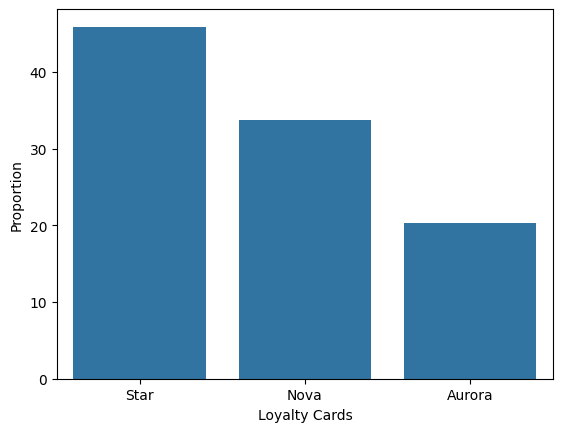

In [128]:
sns.barplot(data=df_activos_cards, x='Loyalty Cards', y='Proportion')

6. ¿Cómo se distribuyen los clientes según su estado civil y género?


In [129]:
df.head(1)

,Loyalty Number,Year,Month,Flights Booked,Flights With Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,Clv,Enrollment Type,Enrollment Year,Enrollment Month,Cancelled
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,False


**Justificación técnica del gráfico**
  
Número de variables = 2  

Tipos de variables: 
- Marital Status (Categórica)
- Gender (Categórica)

Gráfico: Countplot
Explicación de la elección: Se utilizó un countplot porque permite visualizar el conteo de ocurrencias por categoría. Aunque se trata de un grafico de análisis univariado centrado en el estado civil (Marital Status), se añadió el parámetro hue='Gender para desglosar visualmente los datos por género. Esto permite comparar la distribución del estado civil entre hombres y mujeres de forma segmentada.

<Axes: xlabel='Marital Status', ylabel='count'>

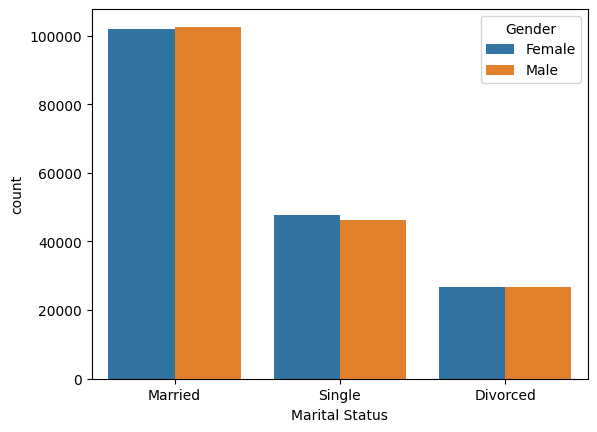

In [130]:
sns.countplot(data=df_activos, x='Marital Status', hue='Gender')

## Extra - Uso de funciones para generar varios gráficos a la vez


In [131]:
def plot_box_by_category(df, numerical_col, category_col):
    # To compare the average or total of a numerical variable across categories
    plt.figure(figsize=(10, 6))  
    sns.boxplot(data=df,x=category_col,y=numerical_col) 
    # Data source
    # Categorical variable on the x-axis
    # Numerical variable on the y-axis
    
    plt.title(f'{numerical_col} by {category_col}')  # Add a dynamic title
    plt.xlabel(category_col)                         # Label for x-axis
    plt.ylabel(numerical_col)                        # Label for y-axis
    plt.xticks(rotation=45)                          # Rotate x-axis labels if needed
    plt.grid(True)                                   # Add grid for better readability
    plt.tight_layout()                               # Adjust layout to avoid clipping
    plt.show()                                       # Display the plot


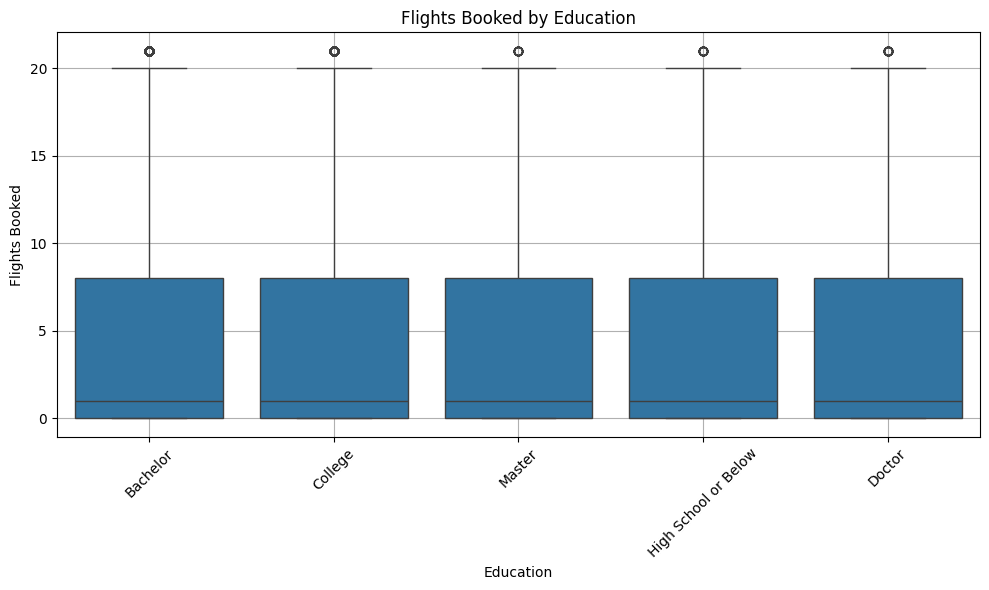

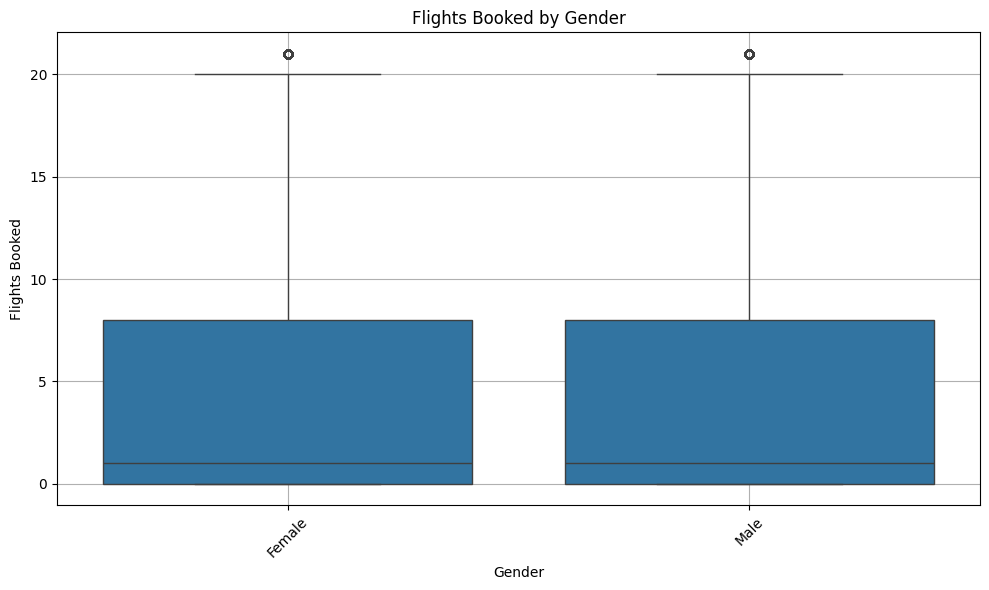

In [132]:
plot_box_by_category(df, 'Flights Booked', 'Education')
plot_box_by_category(df, 'Flights Booked', 'Gender')

